<a href="https://colab.research.google.com/github/raphaelchaves/IFDataBacen/blob/main/Projeto_PLN_ICMC_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://4.bp.blogspot.com/-tbAWK7KCPq0/TbVg-SmjNFI/AAAAAAAAAtQ/QboG2_SDuNo/s1600/logo+fiinal.jpg" width="300">


#Análise de Sentimentos

Projeto sobre análise de sentimentos desenvolvido como parte da disciplina de Processamento em Língua Natural. Postgraduate @ ICMC-USP

## Principais Etapas:
1. **Coleta de Dados**
2. **Pré-processamento de Dados**
3. **Análise Exploratória dos Dados**
4. **Visualização dos Dados**

### 1ª Etapa: Carregando Bibliotecas Necessárias:


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from wordcloud import WordCloud
from google.colab import files

### 2ª Etapa: Carregando Credenciais para Acesso a API do Kaggle (kaggle.json):


In [2]:
import kaggle
uploaded = files.upload()  # Upload the `kaggle.json` file

OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

### 3ª Etapa: Certifica que importação das chaves de acesso está ok:

In [ ]:
print(uploaded.keys())

dict_keys(['kaggle.json'])


### 4ª Etapa: Cria diretório para armazenar credencials do Kaggle:

In [ ]:
!mkdir -p ~/.kaggle  # Create the .kaggle directory if it doesn't exist
!mv kaggle.json ~/.kaggle/  # Move the file
!chmod 600 ~/.kaggle/kaggle.json  # Set strict permissions (required by Kaggle)

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!ls ~/.kaggle/  # Should show 'kaggle.json'

kaggle.json


### 5ª Etapa: Cria diretório do Projeto:

In [ ]:
# Cria o diretório raiz chamado '/content/sentiment_analysis'
!mkdir -p /content/sentiment_analysis

### 6ª Etapa: Efetua o download dos datasets diretamente para o diretório raiz:

In [ ]:
# Efetua o download dos dados extraindo do zip
kaggle.api.dataset_download_files('fredericods/ptbr-sentiment-analysis-datasets', path='/content/sentiment_analysis', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/fredericods/ptbr-sentiment-analysis-datasets


### 7ª Etapa: Carrega conteúdo do dataset para um pandas dataframe:

In [ ]:
df = pd.read_csv('/content/sentiment_analysis/b2w.csv')

NameError: name 'pd' is not defined

### 8ª Etapa: Efetua uma análise visual dos dados:

In [ ]:
display(HTML(df.to_html(max_rows=20)))

### 9ª Etapa: Inicia processo de Análise Exploratória dos Dados:

In [ ]:


# Example DataFrame with sentiment labels
# Assuming 'sentiment_label' is a column in your DataFrame that stores sentiment labels (e.g., 'POSITIVE', 'NEGATIVE')
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Análise de Distribuição de Sentimentos')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


NameError: name 'sns' is not defined

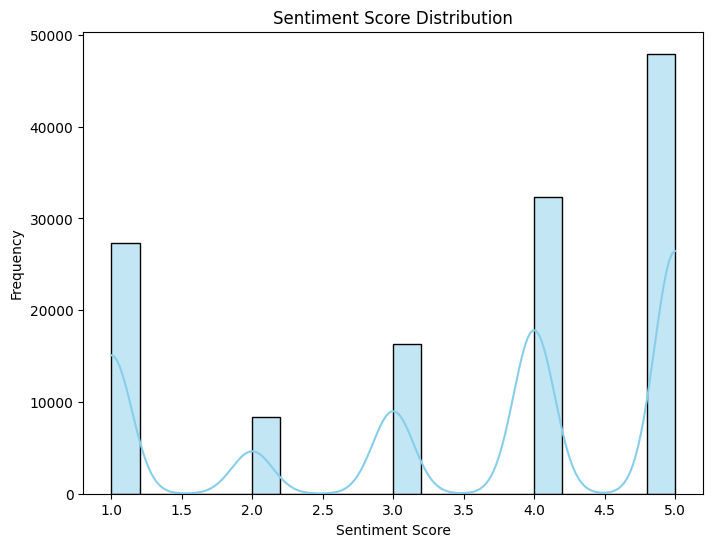

In [ ]:
# Histogram for sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True, color='skyblue', bins=20)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Check the basic statistics of the 'review_text' column (e.g., length of reviews)
df['review_length'] = df['review_text'].apply(len)
print(df['review_length'].describe())

original_index               0
review_text                  0
review_text_processed        0
review_text_tokenized        0
polarity                 16315
rating                       0
kfold_polarity               0
kfold_rating                 0
dtype: int64
count    132373.000000
mean        141.778505
std         137.057280
min          50.000000
25%          68.000000
50%          97.000000
75%         160.000000
max        4548.000000
Name: review_length, dtype: float64


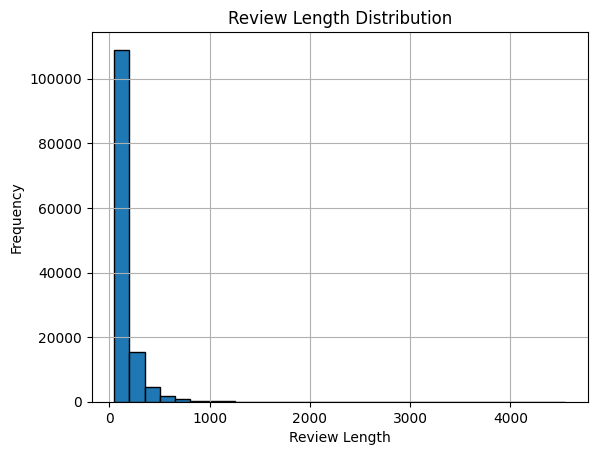

In [ ]:
# Plot distribution of review lengths
df['review_length'].hist(bins=30, edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

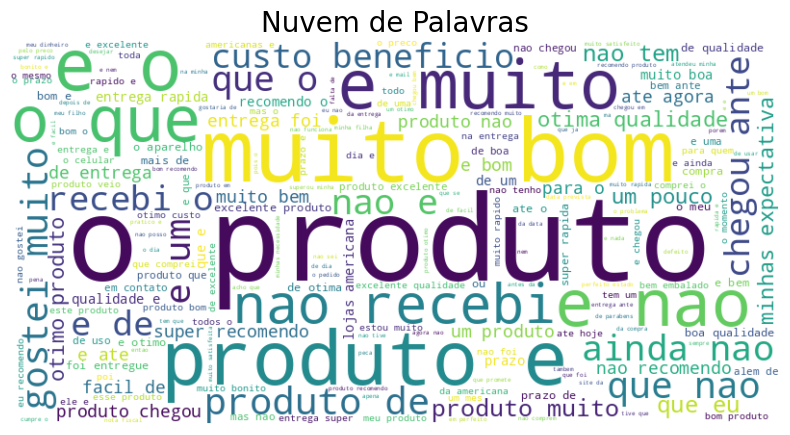

In [ ]:
# Combine all the reviews into a single string
text = ' '.join(df['review_text_processed'])

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title("Nuvem de Palavras", fontsize=20)
plt.show()

In [ ]:
# Check the number of unique reviews and other general info
print(f"Number of unique reviews: {df['review_text'].nunique()}")
print(f"Total number of reviews: {len(df)}")

Number of unique reviews: 129792
Total number of reviews: 132373


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the necessary data for Portuguese tokenization

# Set up Portuguese stopwords
stop_words = set(stopwords.words('portuguese'))

# Define a function to clean the text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-záéíóúãõâêîôûàèùç]+', ' ', text)  # Remove non-alphabetic characters
    words = word_tokenize(text, language='portuguese')  # Tokenize
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply text cleaning
df['cleaned_review'] = df['review_text'].apply(clean_text)
print(df[['review_text', 'cleaned_review']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                         review_text  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...   
1  Produto excepcional!  recomendo!!! inovador e ...   
2  recebi o produto antes do prazo mas veio com d...   
3  Bom custo beneficio. Adequado para pessoas que...   
4  Além de higiênico tem o tamanho ideal. Só falt...   

                                      cleaned_review  
0  bem macio felpudo recomendo preço imbatível en...  
1  produto excepcional recomendo inovador gostoso...  
2  recebi produto antes prazo veio defeito trava ...  
3  bom custo beneficio adequado pessoas fazem uso...  
4  além higiênico tamanho ideal faltou colher gar...  


In [ ]:
from transformers import pipeline

# Load the sentiment analysis pipeline for Portuguese reviews
sentiment_analyzer = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Function to get sentiment for each review
def get_sentiment(text):
  result = sentiment_analyzer(text)
  return result[0]['label'], result[0]['score']

# Apply sentiment analysis to the cleaned reviews
df['sentiment_label'], df['sentiment_score'] = zip(*df['cleaned_review'].apply(get_sentiment))

# Show results
print(df[['cleaned_review', 'sentiment_label', 'sentiment_score']].head())


Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (650 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (650) must match the size of tensor b (512) at non-singleton dimension 1